In [6]:

# Cell 1: Setup and Imports
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
import pandas as pd
import sys

# Add the parent directory to the path to import project modules
sys.path.append('..')
from src import data_processing

# Configure matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
print('---')

---


In [7]:
# Cell 2: Load MIT-BIH Data
# Define the directory where your files are stored
data_dir = 'C:/Users/HP/AIS - PROJECT/arrhythmia_classification/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0'  # Replace with your actual path

# Function to list available records
def list_available_records(data_dir):
    """List all available ECG records in the data directory."""
    record_names = []
    for file in os.listdir(data_dir):
        if file.endswith('.hea'):
            record_name = file.replace('.hea', '')
            record_names.append(record_name)
    return record_names

record_names = list_available_records(data_dir)
print(f"Found {len(record_names)} records: {record_names}")


Found 48 records: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [8]:
# Cell 3: Load a Sample Record
# This cell assumes you have at least one record in your data directory
# If you don't have MIT-BIH data, this will generate some demo data

try:
    # Try to load the first record
    if record_names:
        import random
        record_name = random.choice(record_names)
        record_path = os.path.join(data_dir, record_name)
        
        # Read the record
        record = wfdb.rdrecord(record_path)
        
        # Read the annotation if it exists
        try:
            ann = wfdb.rdann(record_path, 'atr')
            print(f"Successfully loaded annotations for {record_name}")
        except Exception as e:
            print(f"No annotation found for {record_name}: {e}")
            ann = None
            
        # Extract ECG signal and sampling rate
        ecg_signal = record.p_signal
        fs = record.fs
        
        print(f"Record information:")
        print(f"- Sampling frequency: {fs} Hz")
        print(f"- Number of signals: {record.n_sig}")
        print(f"- Signal names: {record.sig_name}")
        print(f"- Duration: {record.sig_len / fs:.2f} seconds")
        
    else:
        # Create synthetic data if no records found
        print("No records found. Creating synthetic ECG data...")
        fs = 250  # Hz
        duration = 10  # seconds
        
        # Time array
        t = np.arange(0, duration, 1/fs)
        
        # Create synthetic ECG with 12 heartbeats (approximately 72 BPM)
        ecg_signal = np.zeros((len(t), 2))  # Two channels
        
        # Create synthetic heartbeats
        for i in range(12):
            t_center = i * 0.83
            # QRS complex
            qrs_mask = (t > t_center - 0.03) & (t < t_center + 0.03)
            ecg_signal[qrs_mask, 0] = 1.5 * np.sin((t[qrs_mask] - t_center) * 150 + np.pi/2)
            ecg_signal[qrs_mask, 1] = 1.2 * np.sin((t[qrs_mask] - t_center) * 150 + np.pi/2)
            
            # P wave
            p_center = t_center - 0.15
            p_mask = (t > p_center - 0.05) & (t < p_center + 0.05)
            ecg_signal[p_mask, 0] += 0.25 * np.sin((t[p_mask] - p_center) * 100 + np.pi/2)
            ecg_signal[p_mask, 1] += 0.2 * np.sin((t[p_mask] - p_center) * 100 + np.pi/2)
            
            # T wave
            t_center = t_center + 0.2
            t_mask = (t > t_center - 0.1) & (t < t_center + 0.1)
            ecg_signal[t_mask, 0] += 0.35 * np.sin((t[t_mask] - t_center) * 50 + np.pi/2)
            ecg_signal[t_mask, 1] += 0.3 * np.sin((t[t_mask] - t_center) * 50 + np.pi/2)
        
        # Add noise
        ecg_signal[:, 0] += np.random.normal(0, 0.05, len(t))
        ecg_signal[:, 1] += np.random.normal(0, 0.04, len(t))
        
        ann = None
        
except Exception as e:
    print(f"Error loading ECG data: {e}")
    # Create synthetic data as fallback
    print("Creating synthetic ECG data...")
    fs = 250  # Hz
    duration = 10  # seconds
    
    # Time array
    t = np.arange(0, duration, 1/fs)
    
    # Create synthetic ECG with 12 heartbeats (approximately 72 BPM)
    ecg_signal = np.zeros((len(t), 2))  # Two channels
    
    # Create synthetic heartbeats
    for i in range(12):
        t_center = i * 0.83
        # QRS complex
        qrs_mask = (t > t_center - 0.03) & (t < t_center + 0.03)
        ecg_signal[qrs_mask, 0] = 1.5 * np.sin((t[qrs_mask] - t_center) * 150 + np.pi/2)
        ecg_signal[qrs_mask, 1] = 1.2 * np.sin((t[qrs_mask] - t_center) * 150 + np.pi/2)
        
        # P wave
        p_center = t_center - 0.15
        p_mask = (t > p_center - 0.05) & (t < p_center + 0.05)
        ecg_signal[p_mask, 0] += 0.25 * np.sin((t[p_mask] - p_center) * 100 + np.pi/2)
        ecg_signal[p_mask, 1] += 0.2 * np.sin((t[p_mask] - p_center) * 100 + np.pi/2)
        
        # T wave
        t_center = t_center + 0.2
        t_mask = (t > t_center - 0.1) & (t < t_center + 0.1)
        ecg_signal[t_mask, 0] += 0.35 * np.sin((t[t_mask] - t_center) * 50 + np.pi/2)
        ecg_signal[t_mask, 1] += 0.3 * np.sin((t[t_mask] - t_center) * 50 + np.pi/2)
    
    # Add noise
    ecg_signal[:, 0] += np.random.normal(0, 0.05, len(t))
    ecg_signal[:, 1] += np.random.normal(0, 0.04, len(t))
    
    ann = None


Successfully loaded annotations for 116
Record information:
- Sampling frequency: 360 Hz
- Number of signals: 2
- Signal names: ['MLII', 'V1']
- Duration: 1805.56 seconds


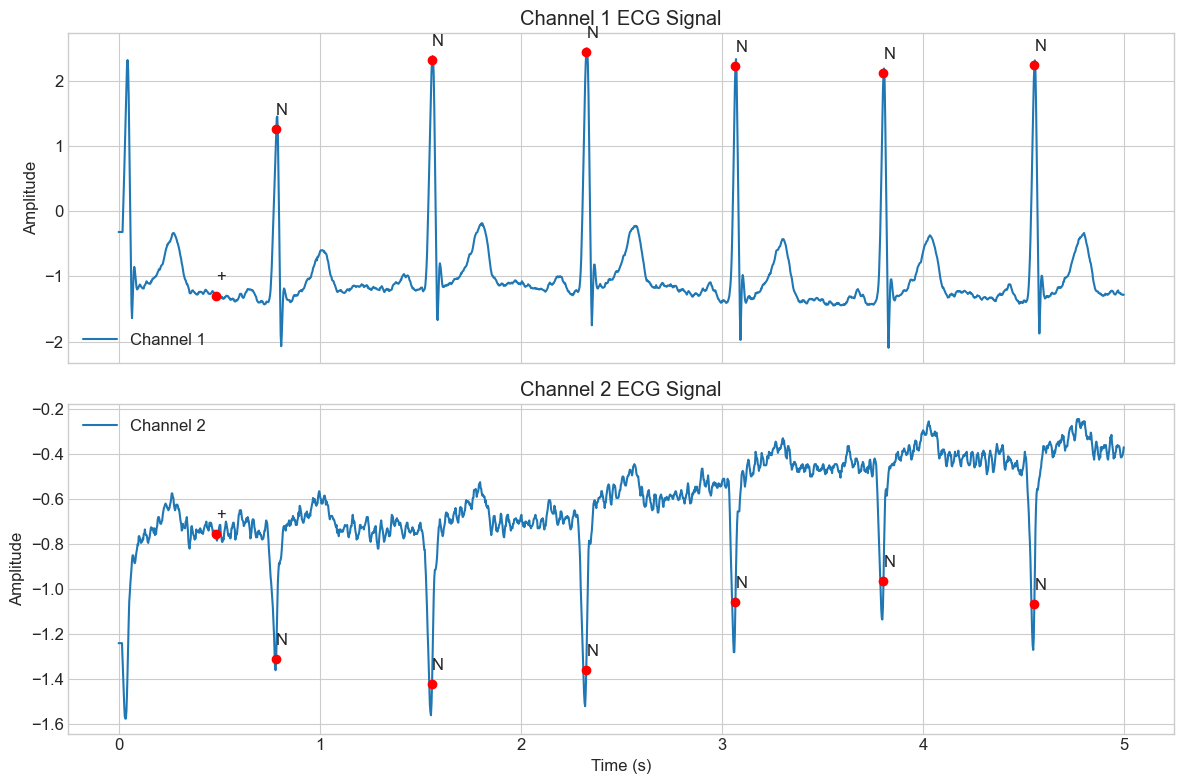

In [9]:
# Cell 4: Visualize the ECG Signal
# Plot the first 5 seconds
duration = 5  # seconds
samples = min(int(duration * fs), ecg_signal.shape[0])

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot each channel
for channel in range(min(2, ecg_signal.shape[1])):
    time = np.arange(samples) / fs
    axes[channel].plot(time, ecg_signal[:samples, channel], label=f"Channel {channel+1}")
    
    # Add annotations if available
    if ann is not None:
        mask = (ann.sample < samples)
        ann_samples = ann.sample[mask]
        ann_symbols = np.array(ann.symbol)[mask]
        
        # Plot annotations
        axes[channel].plot(ann_samples / fs, ecg_signal[ann_samples, channel], 'ro')
        
        # Add annotation labels
        for i, (sample, symbol) in enumerate(zip(ann_samples, ann_symbols)):
            axes[channel].annotate(symbol, (sample / fs, ecg_signal[sample, channel]),
                        xytext=(0, 10), textcoords='offset points')
    
    axes[channel].set_title(f"Channel {channel+1} ECG Signal")
    axes[channel].set_ylabel("Amplitude")
    axes[channel].grid(True)
    axes[channel].legend()

axes[1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


In [10]:
# Cell 5: Extract and Analyze Signal Statistics
def compute_signal_statistics(signal):
    """Compute basic statistics for an ECG signal."""
    stats = {
        'mean': np.mean(signal, axis=0),
        'std': np.std(signal, axis=0),
        'min': np.min(signal, axis=0),
        'max': np.max(signal, axis=0),
        'range': np.max(signal, axis=0) - np.min(signal, axis=0),
        'p5': np.percentile(signal, 5, axis=0),
        'p95': np.percentile(signal, 95, axis=0),
    }
    return stats

# Compute statistics for each channel
stats = compute_signal_statistics(ecg_signal)

# Create a DataFrame for better display
channel_names = [f"Channel {i+1}" for i in range(ecg_signal.shape[1])]
stats_df = pd.DataFrame(stats, index=channel_names)

print("ECG Signal Statistics:")
display(stats_df.T)  # Transpose for better display


ECG Signal Statistics:


,Channel 1,Channel 2
mean,-0.936310,-0.761562
std,0.664115,0.229865
min,-5.120000,-2.555000
max,5.115000,0.165000
range,10.235000,2.720000
p5,-1.490000,-1.165000
p95,0.105000,-0.425000


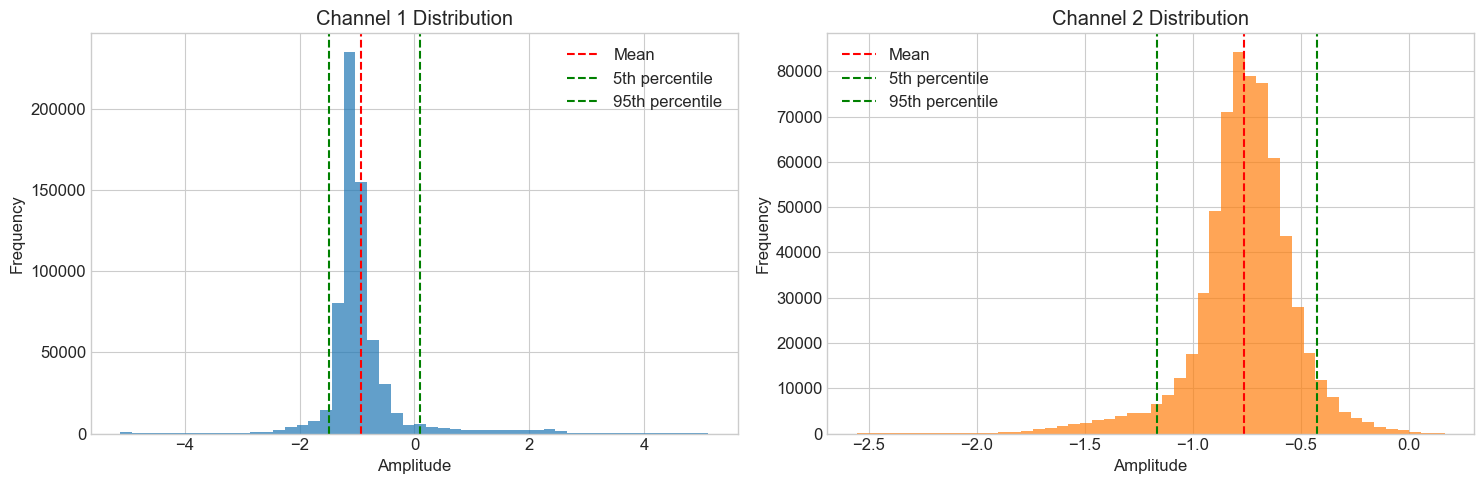

In [11]:
# Cell 6: Visualize the Signal Distribution
fig, axes = plt.subplots(1, ecg_signal.shape[1], figsize=(15, 5))

if ecg_signal.shape[1] == 1:
    axes = [axes]  # Make it iterable if only one channel

for i, ax in enumerate(axes):
    ax.hist(ecg_signal[:, i], bins=50, alpha=0.7, color=f'C{i}')
    ax.axvline(stats['mean'][i], color='r', linestyle='--', label='Mean')
    ax.axvline(stats['p5'][i], color='g', linestyle='--', label='5th percentile')
    ax.axvline(stats['p95'][i], color='g', linestyle='--', label='95th percentile')
    ax.set_title(f'Channel {i+1} Distribution')
    ax.set_xlabel('Amplitude')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


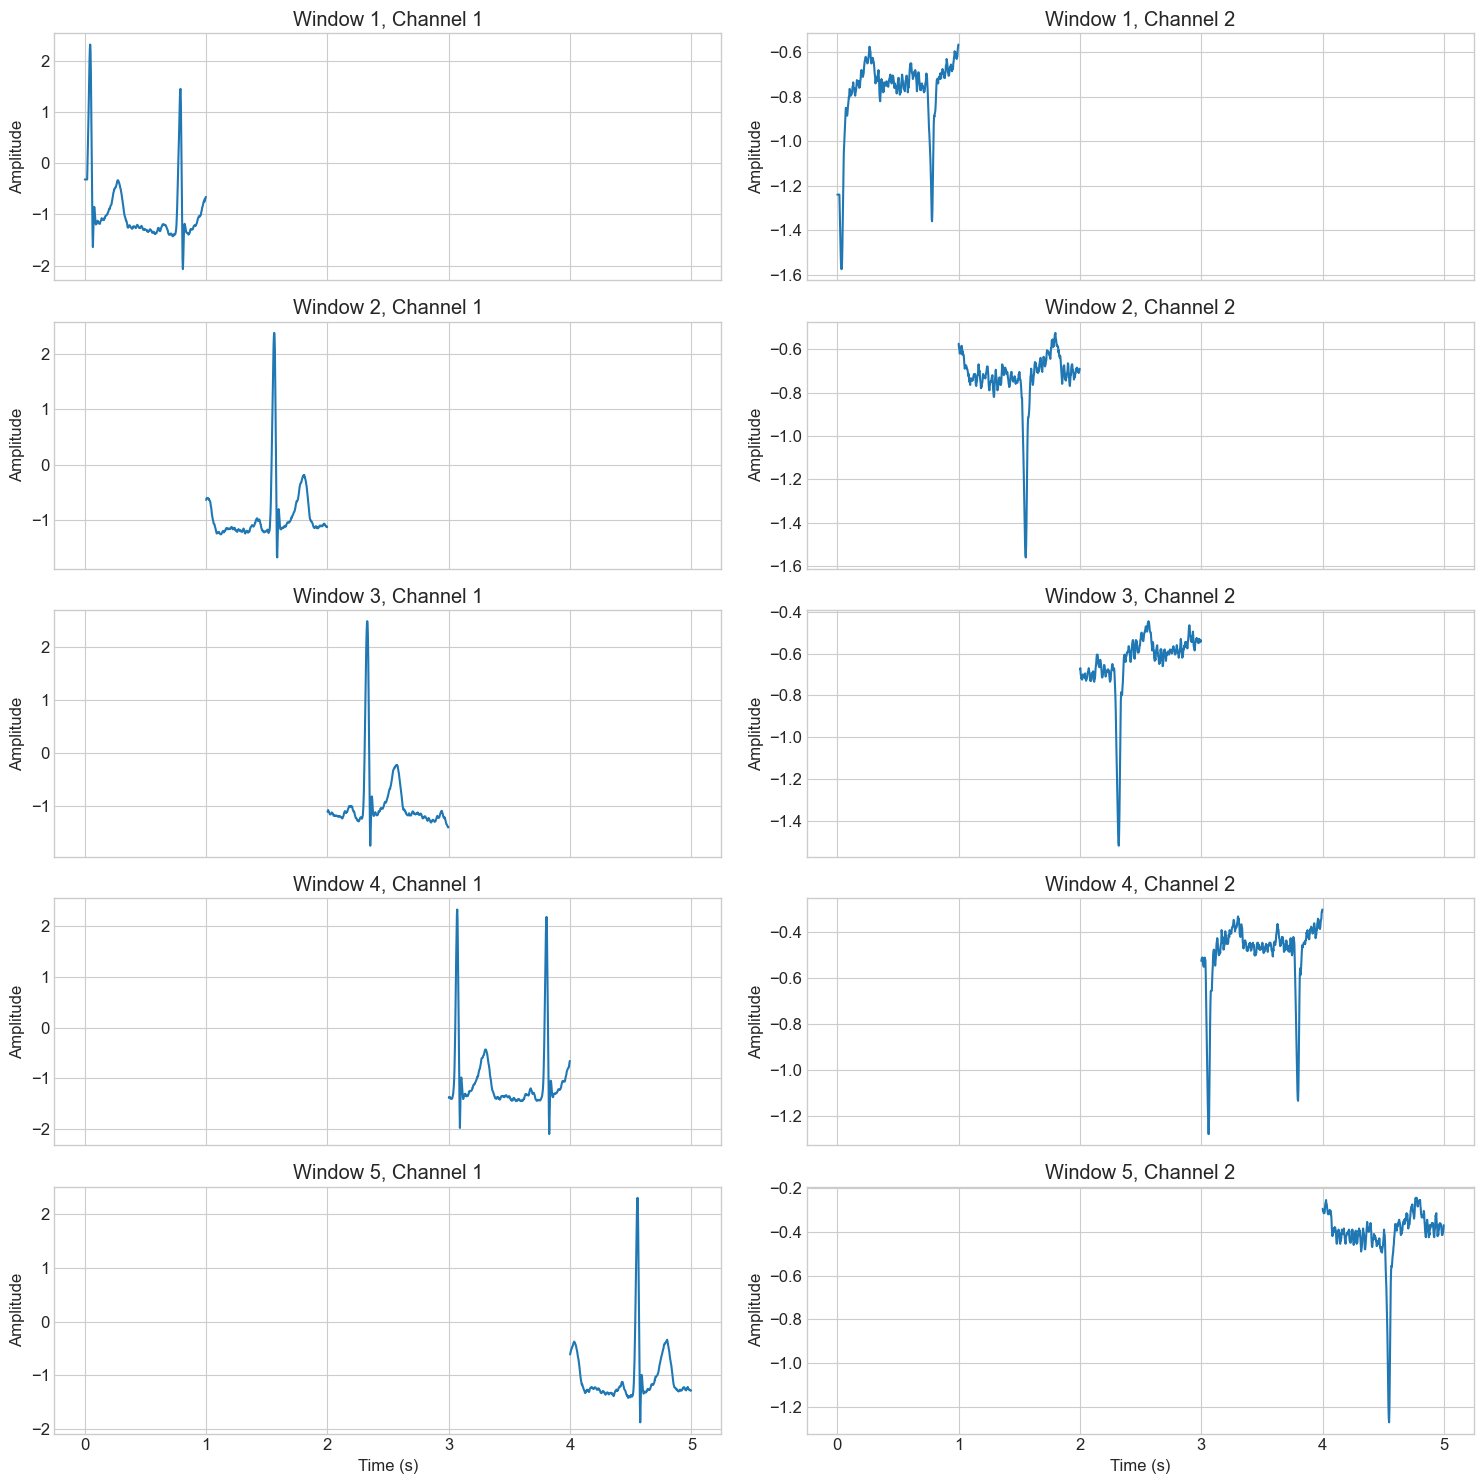

In [12]:
# Cell 7: Segment the Signal into Windows
# Create 1-second segments
window_size = fs  # One second of data
num_windows = min(5, ecg_signal.shape[0] // window_size)  # Limit to 5 windows

fig, axes = plt.subplots(num_windows, ecg_signal.shape[1], figsize=(15, 3*num_windows), sharex=True)

if num_windows == 1 and ecg_signal.shape[1] == 1:
    axes = np.array([[axes]])  # Make it 2D
elif num_windows == 1:
    axes = np.array([axes])  # Make it 2D
elif ecg_signal.shape[1] == 1:
    axes = axes.reshape(-1, 1)  # Make it 2D

for i in range(num_windows):
    start = i * window_size
    end = (i + 1) * window_size
    
    for channel in range(ecg_signal.shape[1]):
        time = np.arange(start, end) / fs
        axes[i, channel].plot(time, ecg_signal[start:end, channel])
        axes[i, channel].set_title(f"Window {i+1}, Channel {channel+1}")
        axes[i, channel].set_ylabel("Amplitude")
        
        if i == num_windows - 1:  # Only for the last row
            axes[i, channel].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()


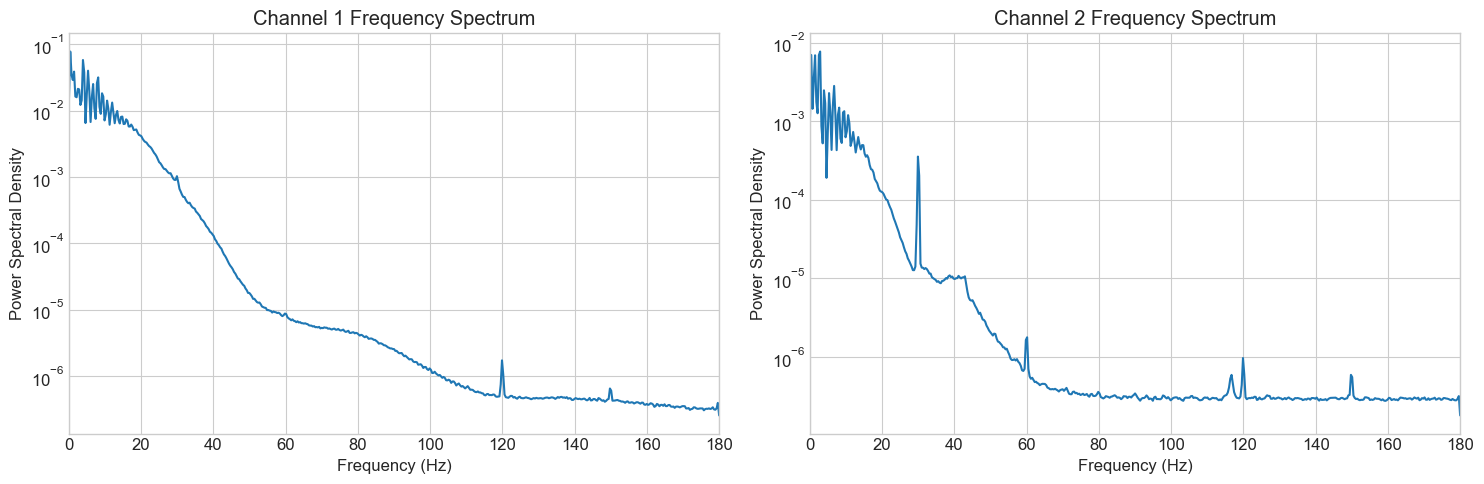

In [13]:
# Cell 8: Analyze the Signal in Frequency Domain
from scipy import signal

def plot_frequency_spectrum(ecg_signal, fs, axes=None):
    """Plot the frequency spectrum for each channel of the ECG signal."""
    if axes is None:
        fig, axes = plt.subplots(1, ecg_signal.shape[1], figsize=(15, 5))
        
    if ecg_signal.shape[1] == 1:
        axes = [axes]  # Make it iterable if only one channel
    
    for channel in range(ecg_signal.shape[1]):
        # Compute frequency spectrum
        f, Pxx = signal.welch(ecg_signal[:, channel], fs, nperseg=1024)
        
        # Plot
        axes[channel].semilogy(f, Pxx)
        axes[channel].set_title(f'Channel {channel+1} Frequency Spectrum')
        axes[channel].set_xlabel('Frequency (Hz)')
        axes[channel].set_ylabel('Power Spectral Density')
        axes[channel].set_xlim([0, fs/2])  # Limit to Nyquist frequency
        axes[channel].grid(True)
    
    plt.tight_layout()
    return axes

# Plot frequency spectrum
plot_frequency_spectrum(ecg_signal, fs)
plt.show()


In [14]:
# Cell 9: Save Processed Data for Further Analysis
# Save the ECG signal to a CSV file for later use
output_dir = '../data/processed'
os.makedirs(output_dir, exist_ok=True)

# Create a DataFrame with time and signal data
time_column = np.arange(ecg_signal.shape[0]) / fs
data = {'Time (s)': time_column}

for channel in range(ecg_signal.shape[1]):
    data[f'Channel_{channel+1}'] = ecg_signal[:, channel]

df = pd.DataFrame(data)

# Save to CSV
output_file = os.path.join(output_dir, 'ecg_signal.csv')
df.to_csv(output_file, index=False)
print(f"Saved ECG data to {output_file}")

# Summary of dataset
print("\nData Summary:")
print(f"- Number of channels: {ecg_signal.shape[1]}")
print(f"- Number of samples: {ecg_signal.shape[0]}")
print(f"- Duration: {ecg_signal.shape[0]/fs:.2f} seconds")
print(f"- Sampling frequency: {fs} Hz")

Saved ECG data to ../data/processed\ecg_signal.csv

Data Summary:
- Number of channels: 2
- Number of samples: 650000
- Duration: 1805.56 seconds
- Sampling frequency: 360 Hz
